# Проектная работа для интернет-магазина

## Задачи исследования:

1.  **Изучение данных:**  
    * Загрузить файлы и посмотреть данные;
    * Посмотреть всю необходимую информацию по структуре дата сетов;
    * Сделать предварительные выводы по качеству данных.  
1. **Предобработка данных:**
    * Найти и обработать пропуски в данных;
    * Заменить некорректные типы данных;
    * Удалить дубликаты;
    * Написать пояснения к проделанным пунктам; 
    * Заменить некорректные названия столбцов;
    * Обработать столбцы с датами и временем
1. **Приоритизация гипотез**
    * Фреймворк ICE для приоритизации гипотез.
    * Фреймворк RICE для приоритизации гипотез.
    * Сравнить два фреймворка.
1. **Анализ А/В теста**
    * Построить график кумулятивной выручки по группам;
    * Построить график кумулятивного среднего чека по группам;
    * Построить график относительного изменения кумулятивного среднего чека группы B к группе A;
    * Построить график кумулятивного среднего количества заказов на посетителя по группам;
    * Построить график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A;
    * Построить точечный график количества заказов по пользователям;
    * Посчитать 95-й и 99-й перцентили количества заказов на пользователя. Выбрать границу для определения аномальных пользователей;
    * Построить точечный график стоимостей заказов;
    * Посчитать 95-й и 99-й перцентили стоимости заказов. Выберать границу для определения аномальных заказов;
    * Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным;
    * Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным;
    * Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным;
    * Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным;
    * Итоговое решение по результатам теста.
1. **Общие выводы и рекомендации**     


## Описание данных

**Данные для приоритизации гипотез**
В файле 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.  

Структура **hypothesis.csv**

* **Hypothesis** — краткое описание гипотезы;
* **Reach** — охват пользователей по 10-балльной шкале;
* **Impact** — влияние на пользователей по 10-балльной шкале;
* **Confidence** — уверенность в гипотезе по 10-балльной шкале;
* **Efforts** — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.



**Данные для анализа А/В теста**  

Структура **orders.csv**
* **transactionId** — идентификатор заказа;
* **visitorId** — идентификатор пользователя, совершившего заказ;
* **date** — дата, когда был совершён заказ;
* **revenue** — выручка заказа;
* **group** — группа A/B-теста, в которую попал заказ.  
  
Структура **visitors.csv**
* **date** — дата;
* **group** — группа A/B-теста;
* **visitors** — количество пользователей в указанную дату в указанной группе A/B-теста



# Выгрузка и изучение данных

In [1]:
# импортируем библиотеки для дальнейшей работы 
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import scipy.stats as stats
import datetime as dt


from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
#снимаем ограничение на количество столбцов
pd.set_option('display.max_columns', None)

# ставим ограничение на показ знаков после запятой
pd.options.display.float_format = '{:,.3f}'.format

# ставим стиль отображения графиков
sns.set_style("darkgrid")

# снимаем ограничение на ширину столбцов
pd.set_option('display.max_colwidth', None)

# задаем размер графика
sns.set(rc={'figure.figsize':(9,5)})

In [3]:
#выгрузим все данные
try:
    hypothesis, orders, visitors = (
    pd.read_csv('hypothesis.csv', sep=','), #гипотезы
    pd.read_csv('orders.csv', sep=','), #журнал заказов
    pd.read_csv('visitors.csv', sep=',') #пользователи по датам
    )
except:
    hypothesis, orders, visitors = (
    pd.read_csv('/datasets/hypothesis.csv', sep=','),
    pd.read_csv('/datasets/orders.csv', sep=','),
    pd.read_csv('/datasets/visitors.csv', sep=',')
    )

In [4]:
# функция для инфы по датасетам
def all_df(df):
    display(df.head())
    print("______________________________________________________")
    print(df.info())
    print("______________________________________________________")
    print("Пропущенных значений в столбцах")
    print(df.isna().sum())
    print("______________________________________________________")
    print(f'число дубликатов в "df":{df.duplicated().sum()}')

In [5]:
all_df(hypothesis)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


______________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
None
______________________________________________________
Пропущенных значений в столбцах
Hypothesis    0
Reach         0
Impact        0
Confidence    0
Efforts       0
dtype: int64
______________________________________________________
число дубликатов в "df":0


In [6]:
all_df(orders)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


______________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
None
______________________________________________________
Пропущенных значений в столбцах
transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64
______________________________________________________
число дубликатов в "df":0


In [7]:
all_df(visitors)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


______________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
None
______________________________________________________
Пропущенных значений в столбцах
date        0
group       0
visitors    0
dtype: int64
______________________________________________________
число дубликатов в "df":0


**Вывод** Пропусков в данных нет. Нужно привести столбцы с датами в необходимый формат. Так же можно для удобства привести названия столбцов в фрейме "hipothesis" в нижний регистр.

# Предобработка данных

In [8]:
# Приведем названия к нижнему регистру
hypothesis.columns = map(str.lower, hypothesis.columns)
orders.columns = [name.replace('Id', '_id') for name in orders.columns]

display(hypothesis.columns)
orders.columns

Index(['hypothesis', 'reach', 'impact', 'confidence', 'efforts'], dtype='object')

Index(['transaction_id', 'visitor_id', 'date', 'revenue', 'group'], dtype='object')

In [9]:
# периведем формат даты
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)



In [10]:
#убедимся что все получилось корректно
display(visitors.info())
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   int64         
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


**Вывод**  
На данном этапе названия  столбцов были приведены к нижнему регистру. А так же столбцы с датами в формате object во всех таблицах переведены в формат datetime

# Приоритизация гипотез

Сделаем приоритизацию гипотез из первого дата фрейма по двум фреймворкам ICE и RiCE

In [11]:
hypothesis['ICE'] = (
                  hypothesis['impact'] * hypothesis['confidence'] /
                   hypothesis['efforts'])

hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000


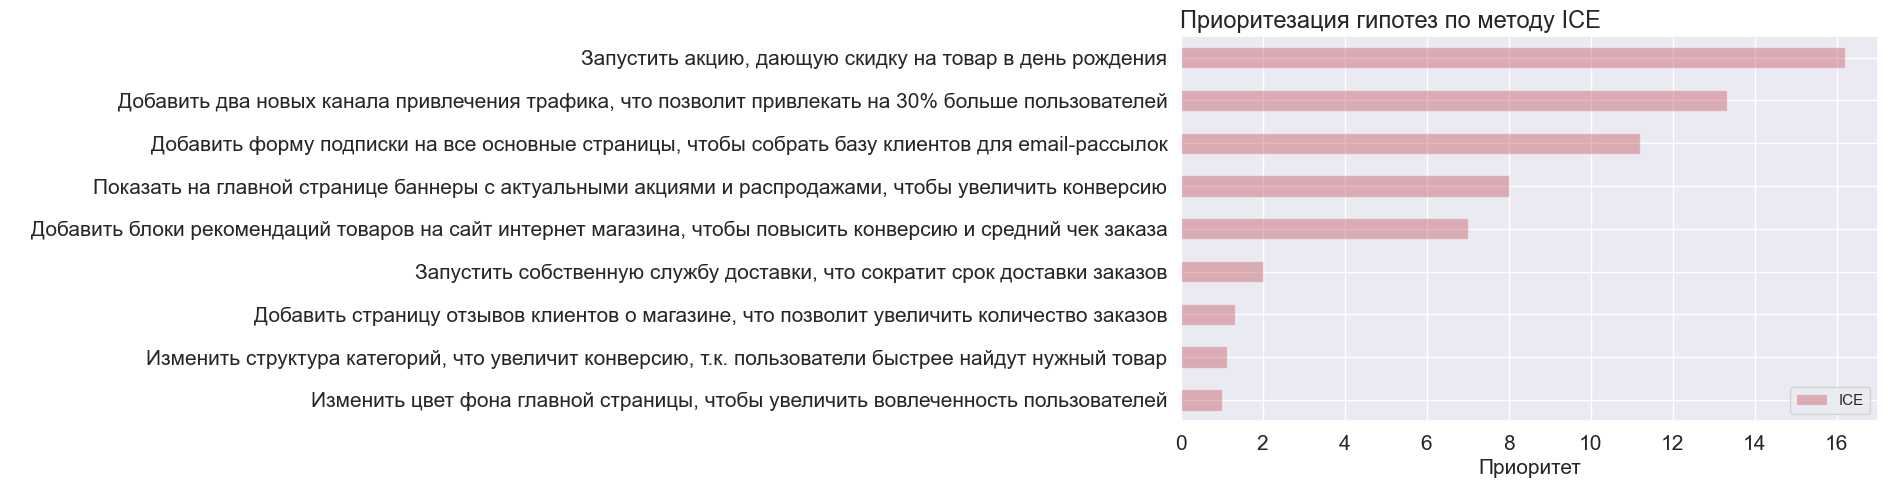

In [12]:
(
    hypothesis[['hypothesis', 'ICE']]
    .set_index('hypothesis')
    .sort_values(by='ICE')
    .plot(kind='barh', color='r', alpha=0.4, fontsize=15)
)
plt.xlabel('Приоритет',fontsize=15)
plt.ylabel(' ')
plt.title('Приоритезация гипотез по методу ICE', loc='left',fontsize=17)
plt.show()

Наиболее перспективными гипотезами по ICE считаются 8,0 и 7.

In [13]:
hypothesis['RICE'] = (
                     hypothesis['reach'] * hypothesis['impact'] * 
                      hypothesis['confidence'] / hypothesis['efforts'])
hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.000
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.000


По RICE же видно, что в лидерах остались 7 и 0, еще добавилась 2 гипотеза, а вот 8(лидер по ICE) вовсе скатилась на 5 место. Здесь пораметр Reach, то есть охват пользователей, на которых повлияет гипотеза существенно изменил приоритизацию. 

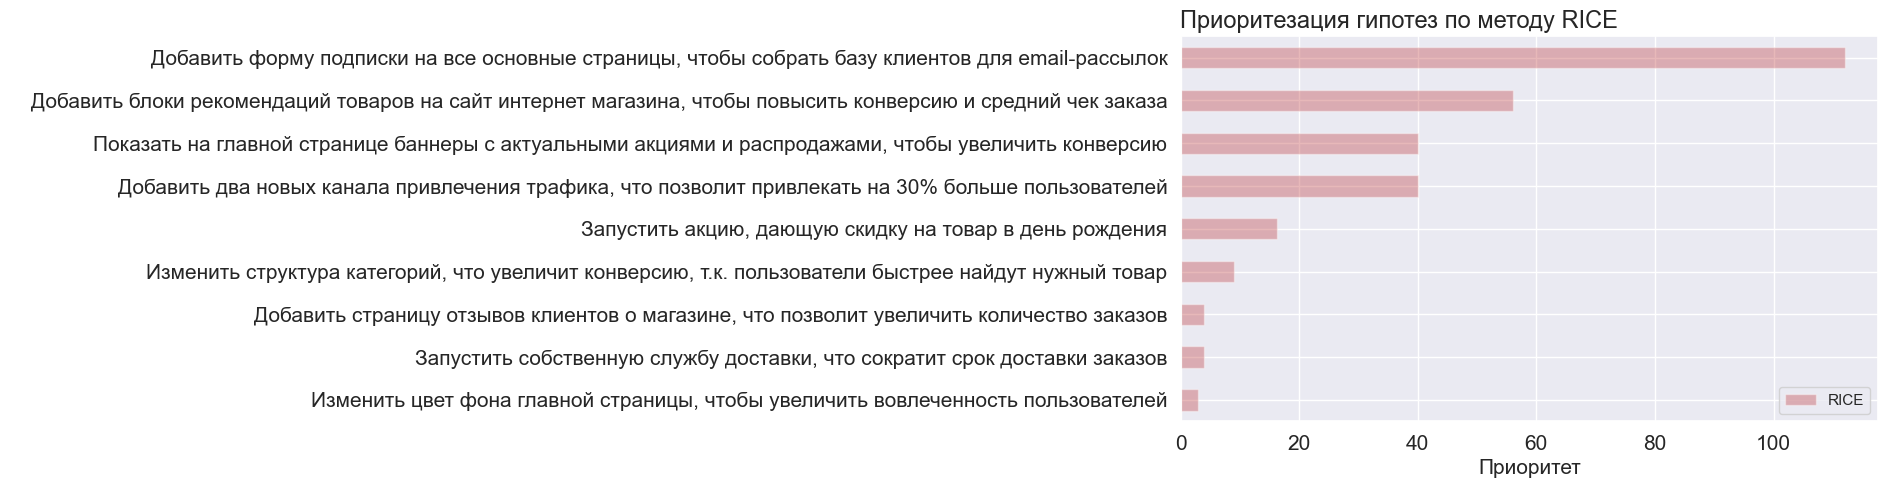

In [14]:
(
    hypothesis[['hypothesis', 'RICE']]
    .set_index('hypothesis')
    .sort_values(by='RICE')
    .plot(kind='barh', color='r', alpha=0.4,fontsize=15)
)
plt.xlabel('Приоритет',fontsize=15)
plt.ylabel(' ')
plt.title('Приоритезация гипотез по методу RICE', loc='left',fontsize=17)
plt.show()
 

**Вывод**
В целом пятерка лидеров среди гипотез по обеим фреймворкам одна и та же. Но порядок их расположения разный. Разница приоритизаций состоит в том, что RICE учитывает количество пользователей, которых затронут измениния, а ICE нет. Поэтому и акция на скидку в день рождения ушла при втором способе вниз, ведь она будет затрагивать только определенное колличество пользователей в день, да и не все указывают дату. В то время, как Форму подписки на всех остальных страницах увидит большинство пользователей сайта.

# Анализ А/В теста

In [15]:
#смотрим даты начала и окончания теста
print(orders['date'].min())
print(orders['date'].max())

2019-08-01 00:00:00
2019-08-31 00:00:00


In [16]:
#сколько человек в каждой группе.
print('Количество пользователей в группее А', orders[orders['group'] == 'A']['visitor_id'].nunique())
print('Количество пользователей в группее В', orders[orders['group'] == 'B']['visitor_id'].nunique())
print('Всего участников эксперимента', orders['visitor_id'].nunique())

Количество пользователей в группее А 503
Количество пользователей в группее В 586
Всего участников эксперимента 1031


В ходе эксперимента был проведен А/В тест. В тесте принимали участие две группы. Проводился он ровно месяц  с 8 по 31 августа 2019 года к сожалению заданных рамок его проведения у нас нет, поэтому нельзя сказать на сколько планировалось его запустить и в какие сроки увидеть результаты. В группу А вошли 503 уникальных пользователя в группу B 586. Оказывается всего было 1031 участник. Значит помимо того, что наши группы поделеты не равномерно и разница в них больше 1%, еще и кто-то из пользователей явно попал в обе группы сразу.

In [17]:
(
    len(np.intersect1d(orders.query('group == "A"')['visitor_id'].unique(),
                       orders.query('group == "B"')['visitor_id'].unique()))
)


58

Видимо распределение пользователей по группам где-то дало сбой и в обе группы попали 58 пользователей.  
В масштабах всего тестирования, где всего участвовало 1031 пользователя, 58 значений это около 5,6% от выборки. Процент не очень велик но тем не менее подобное пересечение может создавать искажения результатов, поэтому отфильтруем данные, исключив этих пользователей.

In [18]:
id_list = np.intersect1d(orders.query('group == "A"')['visitor_id'].unique(),
                       orders.query('group == "B"')['visitor_id'].unique())


In [19]:
id_list = id_list.tolist()

orders = orders[~orders.visitor_id.isin(id_list)]

In [20]:
#снова смотрим сколько совпадений
(
    len(np.intersect1d(orders.query('group == "A"')['visitor_id'].unique(),
                       orders.query('group == "B"')['visitor_id'].unique()))
)


0

In [21]:
#сколько человек в каждой группе.
print('Количество пользователей в группее А', orders[orders['group'] == 'A']['visitor_id'].nunique())
print('Количество пользователей в группее В', orders[orders['group'] == 'B']['visitor_id'].nunique())
print('Всего участников эксперимента', orders['visitor_id'].nunique())

Количество пользователей в группее А 445
Количество пользователей в группее В 528
Всего участников эксперимента 973


После удаления пользователей попавших в обе группы раздниуа между ними соответственно осталась прежней 1.5%, а общее количество участников сократилось до 973 человек. Не совсем понятно достаточно ли этого количества для оценки результатов и сколько человек планировалось набрать. 

Для постороения граффиков по кумулятивным (накапливаемым) данным соберем соответствующий агрегированный датафрейм. В него войдут информация о дате, группе теста, коммулятивное количество заказов и пользователей их оформивших, средний чек и коммулятивное кколичество посетителей магазина.

In [22]:
# массив уникальных значений
dates_grouped = orders[['date', 'group']].drop_duplicates()

# агрегированные данные о заказах по дням 
orders_agregated = dates_grouped.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transaction_id': 'nunique',
            'visitor_id': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

orders_agregated.head()

,date,group,transaction_id,visitor_id,revenue
55,2019-08-01,A,23,19,142779
66,2019-08-01,B,17,17,59758
175,2019-08-02,A,42,36,234381
173,2019-08-02,B,40,39,221801
291,2019-08-03,A,66,60,346854


In [23]:
# агрегированные данные о количестве посетителей

visitors_agregated = dates_grouped.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max', 
            'group': 'max', 
            'visitors': 'sum'
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitors_agregated.head()
 

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


In [24]:
# объединим полученные таблицы

cumulative_data = orders_agregated.merge(
    visitors_agregated, left_on=['date', 'group'], right_on=['date','group']
)

# зададим названия колонок

cumulative_data.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

# добавим столбец с конверсией

cumulative_data['conversion'] = (
    cumulative_data['orders'] / cumulative_data['visitors']
)

cumulative_data.head()

,date,group,orders,buyers,revenue,visitors,conversion
0,2019-08-01,A,23,19,142779,719,0.032
1,2019-08-01,B,17,17,59758,713,0.024
2,2019-08-02,A,42,36,234381,1338,0.031
3,2019-08-02,B,40,39,221801,1294,0.031
4,2019-08-03,A,66,60,346854,1845,0.036


## График кумулятивной выручки по группам

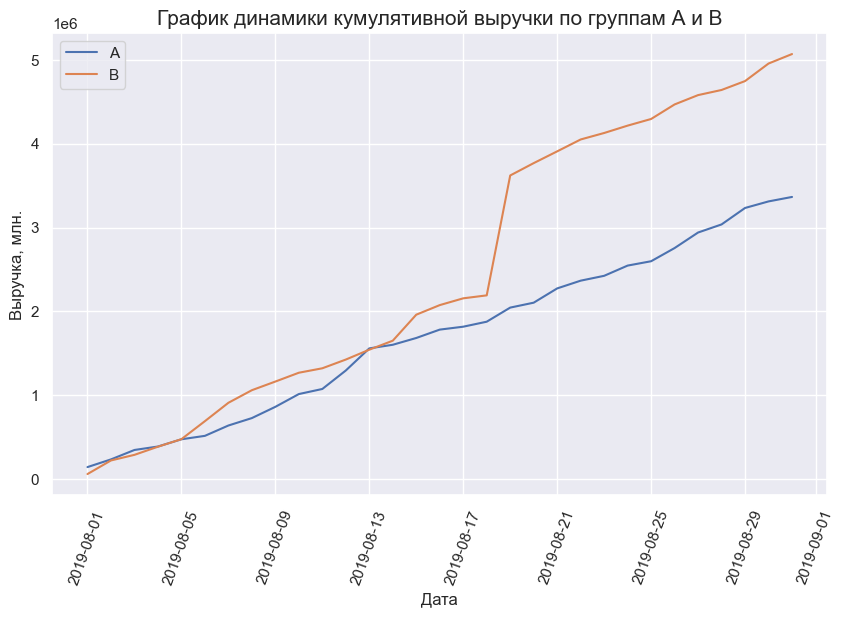

In [25]:
# разделим на 2 фрейма по группам 
cumulative_revenue_a  = cumulative_data[cumulative_data['group']=='A'][['date','revenue', 'orders']]
cumulative_revenue_b =  cumulative_data[cumulative_data['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(10, 6))
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue'], label='А')
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue'], label='B')


plt.title('График динамики кумулятивной выручки по группам А и В',fontsize=15)
plt.ylabel("Выручка, млн.")
plt.xlabel('Дата')
plt.xticks(rotation=70)
plt.legend()
plt.show()

Из граффика видно что выручка группы А растет достаточно равномерно, и стабильно ниже выручки в группе В. А вот в группе В имеется сильный скачек, что может свидетельствовать о выбросах в данных. Скорей всего на скачек может влиять наличие аномально дорогих заказов или же всплеске числа заказов в этот день.

## График кумулятивного среднего чека по группам

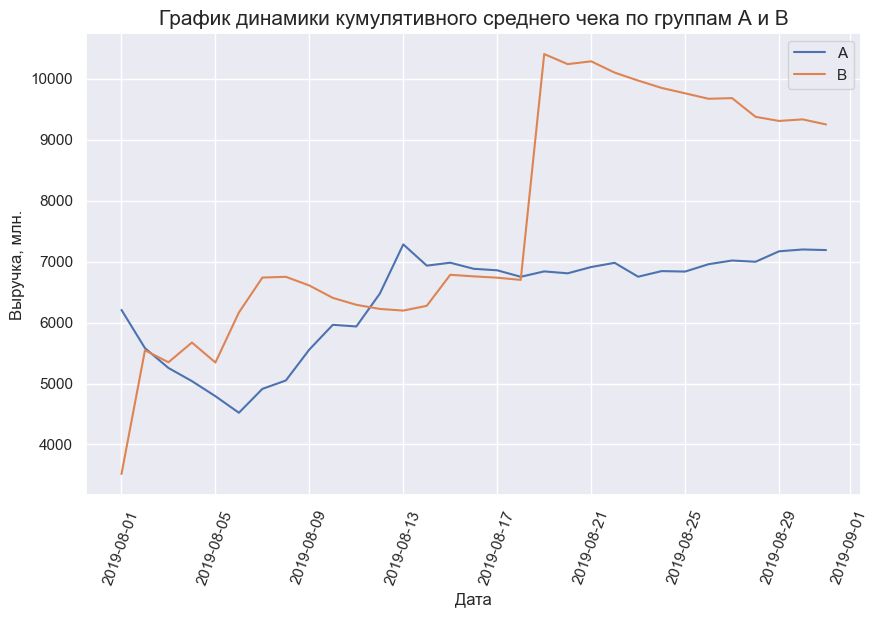

In [26]:
plt.figure(figsize=(10, 6))
plt.plot(cumulative_revenue_a['date'], 
         cumulative_revenue_a['revenue'] / cumulative_revenue_a['orders'],
         label='A')

plt.plot(cumulative_revenue_b['date'], 
         cumulative_revenue_b['revenue'] / cumulative_revenue_b['orders'], 
         label='B')

plt.title('График динамики кумулятивного среднего чека по группам А и В', fontsize=15)
plt.ylabel("Выручка, млн.")
plt.xlabel('Дата')
plt.xticks(rotation=70)
plt.legend()
plt.show()

Видно что в группе A снова в тот же день наблюдается сильный скачек в среднем чеке, что подтверждает версию о слишком дорогом закезе, сильно повлиявшем на распределение.

## График относительного изменения кумулятивного среднего чека группы B к группе A.

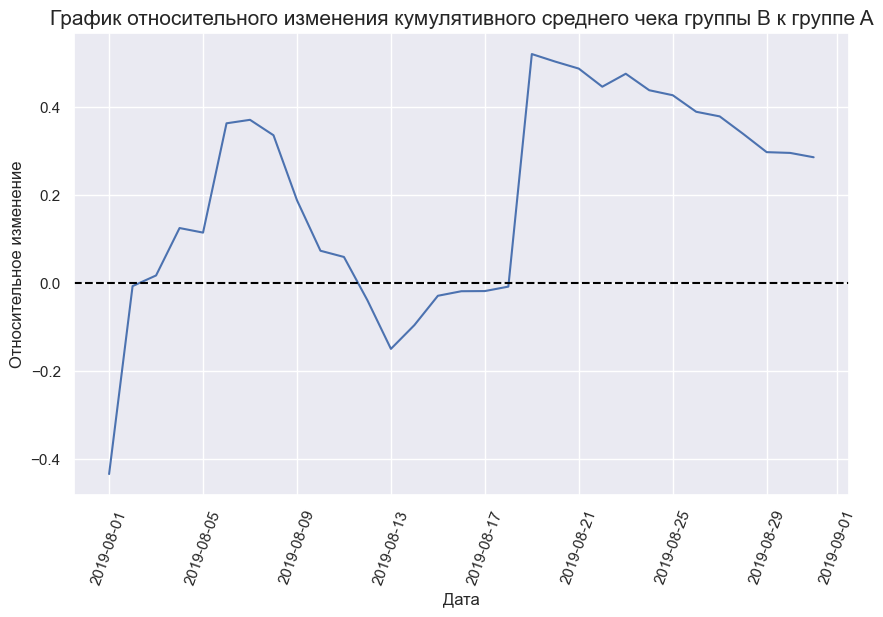

In [27]:
# объединим данные 
cumulative_revenue_ab = cumulative_revenue_a.merge(
    cumulative_revenue_b,
    left_on='date',
    right_on='date',
    how='left',
    suffixes=['_a', '_b']
)
plt.figure(figsize=(10, 6))
#строим график 
plt.plot(cumulative_revenue_ab['date'], 
         (
             cumulative_revenue_ab['revenue_b']/cumulative_revenue_ab['orders_b']
         )/
         (
             cumulative_revenue_ab['revenue_a']/cumulative_revenue_ab['orders_a']
         )-1
        )


plt.axhline(y=0, color='black', linestyle='--')
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A', fontsize=15)
plt.ylabel("Относительное изменение")
plt.xlabel('Дата')
plt.xticks(rotation=70)
plt.show()

Результаты теста действительно сильно менялись в несколько дат. одна из них опять таки совпадает с прошлыми графиками, что опять подтверждает нашу теорию. Видимо именно тогда были совершены аномальные заказы. 

## График кумулятивного среднего количества заказов на посетителя по группам.

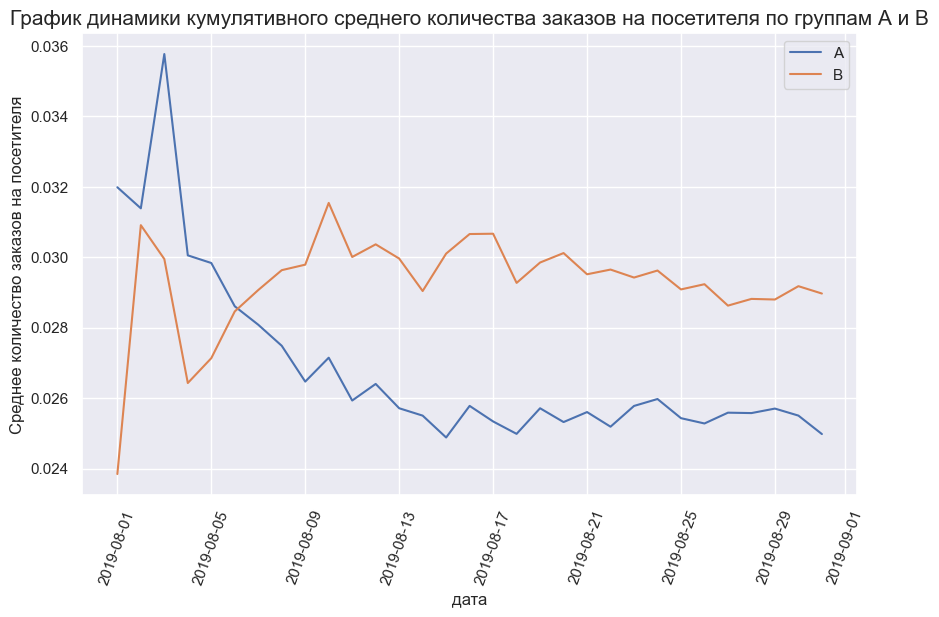

In [28]:
# отделяем данные по группе A
cumulative_data_a = cumulative_data[cumulative_data['group']=='A']

# отделяем данные по группе B
cumulative_data_b = cumulative_data[cumulative_data['group']=='B']

plt.figure(figsize=(10, 6))
plt.plot(cumulative_data_a['date'], cumulative_data_a['conversion'], label='A')
plt.plot(cumulative_data_b['date'], cumulative_data_b['conversion'], label='B')

plt.title('График динамики кумулятивного среднего количества заказов на посетителя по группам А и В', fontsize=15)
plt.ylabel("Среднее количество заказов на посетителя")
plt.xlabel('дата')
plt.xticks(rotation=70)
plt.legend()
#plt.ylim(0, 0.05)
plt.show()

По граффику с отношением числа заказов к количеству пользователей в указанной группе в указанный день или  конверсии видно, что обе группы спустя некоторое количество скачков, стабилизировались. Так же видно что конверсия в группе В начиная с 6 августа стабильно выше.

## График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.

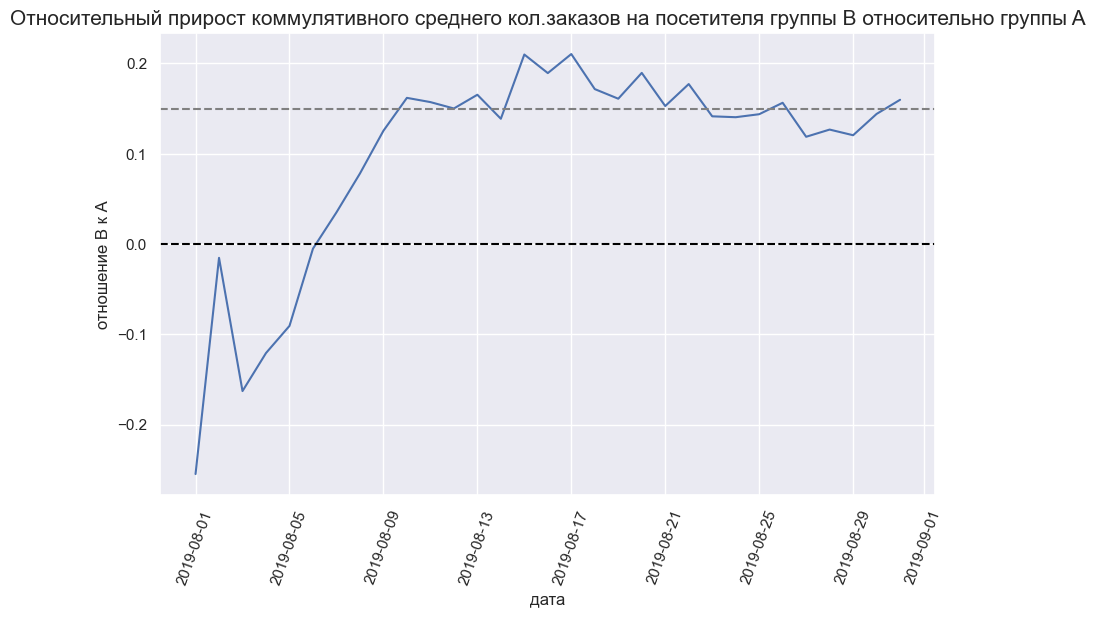

In [29]:
cumulative_conversions_ab = (
    cumulative_data_a[['date','conversion']]
    .merge(
        cumulative_data_b[['date','conversion']], 
        left_on='date', 
        right_on='date', 
        how='left', 
        suffixes=['_a', '_b']
    ))
plt.figure(figsize=(10, 6))
plt.plot(
    cumulative_conversions_ab['date'], 
    cumulative_conversions_ab['conversion_b']/
    cumulative_conversions_ab['conversion_a']-1
)


plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')
plt.title('Относительный прирост коммулятивного среднего кол.заказов на посетителя группы B относительно группы A',
         fontsize=15)
plt.xlabel('дата')
plt.ylabel('отношение B к А')
plt.xticks(rotation=70)
plt.show()

В начале теста группа B значительно проигрывала группе A, затем вырвалась вперёд. Потом её среднее количество заказов на посетителя сново падает, но теперь постепенно растёт. Опираясь на прошлые графики мы знаем, что у нас существуют в даных выбросы, поэтому необходимо от них избавиться и посмотреть на очищенную картину.

## График количества заказов по пользователям.

Посмотрим на анамальные значения в количестве заказов по пользователям с помощью граффиков.

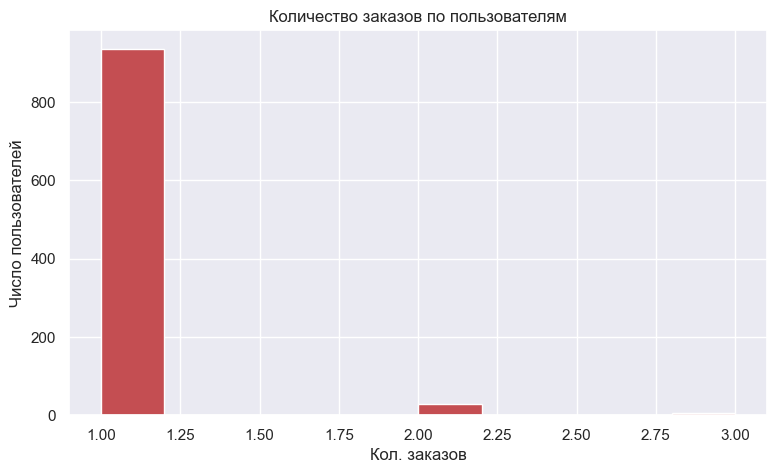

In [30]:
orders_by_users = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id':'nunique'})
)
orders_by_users.columns =  ['visitor_id', 'orders']

plt.hist(orders_by_users['orders'], color='r')
plt.title('Количество заказов по пользователям')
plt.xlabel('Кол. заказов')
plt.ylabel('Число пользователей')
plt.show()

По графику видно, что в основном большинство пользователей заказывали только один раз за этот месяц, но доля пользователей с 2 заказами, тоже значительная.
Посмотрим теперь на точечную диаграмму что бы оценить количестко выбивающихся значений.

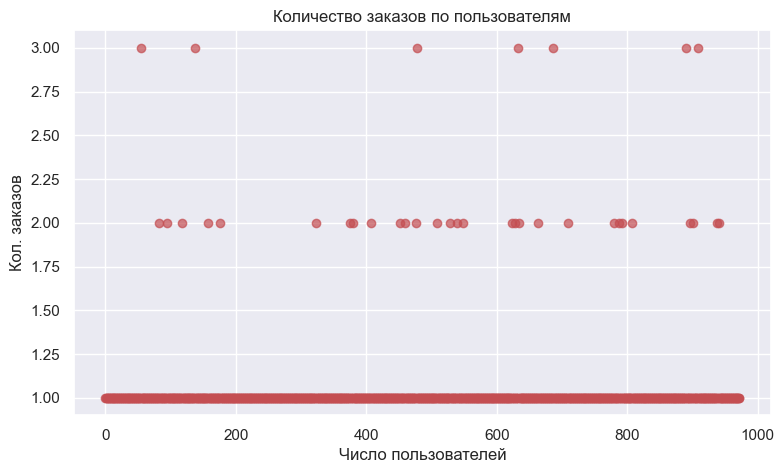

In [31]:
x_values = pd.Series(range(0,len(orders_by_users)))

plt.scatter(x_values, orders_by_users['orders'], color='r',alpha=0.7) 
plt.title('Количество заказов по пользователям')
plt.xlabel('Число пользователей')
plt.ylabel('Кол. заказов')
plt.show()

Достаточно много пользователей и с 3мя заказами. Но доля их не ясна, пока не понятно считать их за аномалии или нет. Для того, что бы определиться посчитаем 95-й и 99-й перцинтили кол. заказов и выберем границу, для определения аномальных пользователей.

In [32]:
np.percentile(orders_by_users['orders'],[95,99])

array([1., 2.])

Не более 5% пользователей оформляли больше одного заказа, и лишь 1% больше 2х.
В качестве границы будет разумно выбрать 2 заказа на человека. И отсеять пользователей, у кого заказов больше.
Примем за верхнюю границу 2 заказа на пользователя.

##  График стоимостей заказов.

Посмотрим теперь на распределение стоимости заказов.

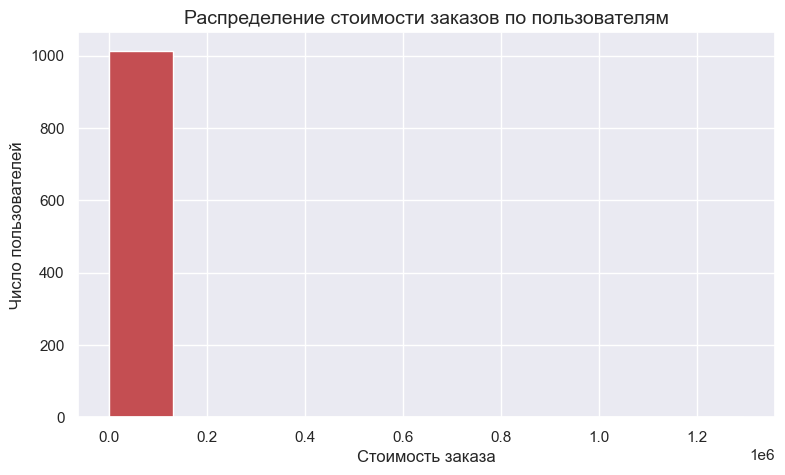

In [33]:
plt.hist(orders['revenue'], color='r')
plt.title('Распределение стоимости заказов по пользователям',fontsize=14)
plt.xlabel('Стоимость заказа')
plt.ylabel('Число пользователей')
plt.show()

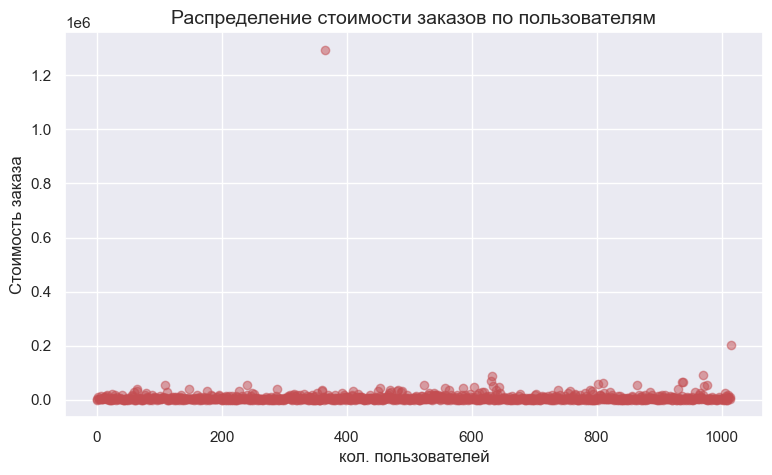

In [34]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'], color='r', alpha=0.5)

plt.title('Распределение стоимости заказов по пользователям',fontsize=14)
plt.xlabel('кол. пользователей')
plt.ylabel('Стоимость заказа')
plt.show()

Видны 2 выбивающихся заказа. Особенно сильно влияет заказ более 1.2млн.
Можно еще посмотреть на распределение без этих 2х точек.

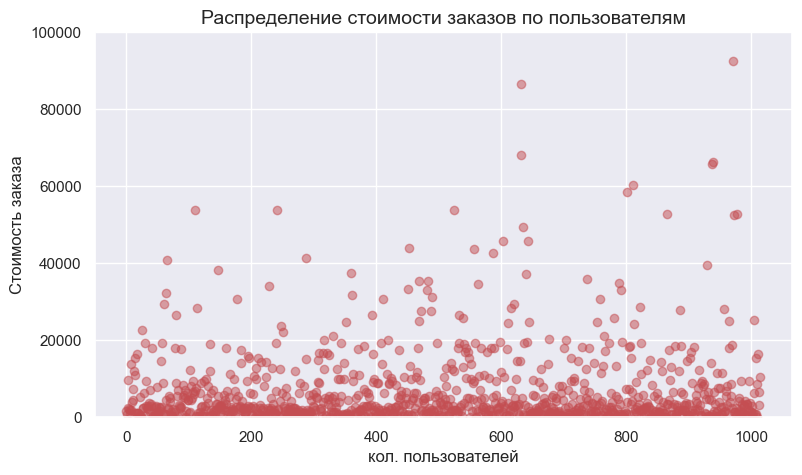

In [35]:

plt.scatter(x_values, orders['revenue'], color='r', alpha=0.5)
plt.ylim(0, 100000)
plt.title('Распределение стоимости заказов по пользователям',fontsize=14)
plt.xlabel('кол. пользователей')
plt.ylabel('Стоимость заказа')
plt.show()

Теперь лучше видно, что большинство заказов находится в пределах 20000-30000.
Оценим границы для выбросов по 95 и 99 перцентилям.

In [36]:
np.percentile(orders['revenue'], [95,98,99])

array([26785., 42353., 53904.])

95% находятся в пределах 26785. И всего 1% превышает 53904 
Отбросим заказы превышающие 42353 это 2% от общего числа.

## Cтатистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. 

Так как данные о продажах и средних чеках редко бывают нормально распределены (это классический пример переменных, подверженных выбросам), для проверки гипотез будем использовать непараметрический тест Уилкоксона-Манна-Уитни.
При уровне значимости равном 0.05.

Сформулируем гипотезы:  
**Н0** - Различий в среднем количестве заказов на посетителя по группам нет.  
**Н1** - Различия в среднем между группами есть

In [37]:
# соберем таблицу для оценки значимости

#посетители в группе А
visitors_daily_a = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitors_daily_a.columns = ['date', 'visitors_per_date_a']

visitors_cummulative_a = visitors_daily_a.apply(
    lambda x: visitors_daily_a[visitors_daily_a['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_date_a': 'sum'}
    ),
    axis=1,
)
visitors_cummulative_a.columns = ['date', 'visitors_cummulative_a']

#посетители в В
visitors_daily_b = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitors_daily_b.columns = ['date', 'visitors_per_date_b']

visitors_cummulative_b = visitors_daily_b.apply(
    lambda x: visitors_daily_b[visitors_daily_b['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_date_b': 'sum'}
    ),
    axis=1,
)
visitors_cummulative_b.columns = ['date', 'visitors_cummulative_b']

#заказы в А 
orders_daily_a = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
orders_daily_a.columns = ['date', 'orders_daily_a', 'revenue_per_date_a']

orders_cummulative_a = orders_daily_a.apply(
    lambda x: orders_daily_a[orders_daily_a['date'] <= x['date']].agg(
        {'date': 'max', 'orders_daily_a': 'sum', 'revenue_per_date_a': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])

orders_cummulative_a.columns = ['date','orders_cummulative_a','revenue_cummulative_a']

#заказы в В
orders_daily_b = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
orders_daily_b.columns = ['date', 'orders_daily_b', 'revenue_per_date_b']

orders_cummulative_b = orders_daily_b.apply(
    lambda x: orders_daily_b[orders_daily_b['date'] <= x['date']].agg(
        {'date': 'max', 'orders_daily_b': 'sum', 'revenue_per_date_b': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])

orders_cummulative_b.columns = ['date','orders_cummulative_b','revenue_cummulative_b']

# объединяем таблицы
data = (
    orders_daily_a.merge(
        orders_daily_b, left_on='date', right_on='date', how='left'
    )
    .merge(orders_cummulative_a, left_on='date', right_on='date', how='left')
    .merge(orders_cummulative_b, left_on='date', right_on='date', how='left')
    .merge(visitors_daily_a, left_on='date', right_on='date', how='left')
    .merge(visitors_daily_b, left_on='date', right_on='date', how='left')
    .merge(visitors_cummulative_a, left_on='date', right_on='date', how='left')
    .merge(visitors_cummulative_b, left_on='date', right_on='date', how='left')
)

data.head()

,date,orders_daily_a,revenue_per_date_a,orders_daily_b,revenue_per_date_b,orders_cummulative_a,revenue_cummulative_a,orders_cummulative_b,revenue_cummulative_b,visitors_per_date_a,visitors_per_date_b,visitors_cummulative_a,visitors_cummulative_b
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


* **date** — дата;
* **orders_daily_a** — количество заказов в группе A;
* **revenue_per_date_a** — суммарная выручка в группе A;
* **orders_daily_a** — количество заказов в группе B;
* **revenue_per_date_a** — суммарная выручка в группе B;
* **orders_cummulative_a** — куммулятивное число заказов  в группе A;
* **revenue_cummulative_a** — куммулятивная выручка в группе A;
* **orders_cummulative_b** — куммулятивное количество заказов в группе B;
* **revenue_cummulative_b** — куммулятивная выручка в группе B;
* **visitors_per_date_a** — количество пользователей в группе A;
* **visitors_per_date_b** — количество пользователей в группе B;
* **visitors_cummulative_a** — коммулятивное количество пользователей  в группе A;
* **visitors_cummulative_b** — коммулятивное количество пользователей  в группе B.

Посчитаем статистическую значимость различия в среднем количестве заказов между группами.


In [38]:
#Создадим переменные orders_by_users_a и orders_by_users_b со столбцами ['userId', 'orders'].
#В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.
orders_by_users_a = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_by_users_a.columns = ['visitor_id', 'orders']

orders_by_users_b = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_by_users_b.columns = ['visitor_id', 'orders'] 


#подготавливаем выборки к проверке

sample_a =(
    pd.concat([orders_by_users_a['orders'],
               pd.Series(0, index=np.arange(data['visitors_per_date_a'].sum()
                                            - len(orders_by_users_a['orders'])),
                         name='orders')],axis=0)
)

sample_b =(
    pd.concat([orders_by_users_b['orders'],
               pd.Series(0, index=np.arange(data['visitors_per_date_b'].sum()
                                            - len(orders_by_users_b['orders'])),
                         name='orders')],axis=0)
)



In [39]:
#соберем расчет значимости и ее вывод в функцию для дальнейших расчетов 
def our_stat(df_a, df_b):
    alpha = 0.05
    p_value = stats.mannwhitneyu(df_a,df_b)[1]
    print('P-value: {0:.3f}'.format(p_value))
    if(p_value > alpha):
        print('Не удалось отвергнуть нулевую гипотезу. Различий между группами нет.')
    else:
        print('Отвергаем нулевую гипотезу. Различия между группами есть.')
    print("Относительный прирост В к А: {0:.2%}".format(df_b.mean() / df_a.mean()-1))       

In [40]:
our_stat(sample_a,sample_b)

P-value: 0.011
Отвергаем нулевую гипотезу. Различия между группами есть.
Относительный прирост В к А: 15.98%


По сырым данным видно, что различия между группами есть. РОтносительный выйгрыш группы В равен почти 14%.

## Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным. 

Теперь посчитаем различия между группами в среднем чеке по сырым данным.  
Сформулируем гипотезы:  
* **H0** - Различий в среднем чеке заказа между группами А и В нет.
* **Н1** - Различия в сделнем чеке заказа между группами А и В есть.

In [41]:
our_stat(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])

P-value: 0.829
Не удалось отвергнуть нулевую гипотезу. Различий между группами нет.
Относительный прирост В к А: 28.66%


По сырым данным видно, что p-value значительно больше alpha=0.05, следовательно причин отвергать нулевую гипотезу у нас нет. Различий в среднем чеке между группами нет, несмотря на то, что средний чек группы В значительно выше (на 28,66%)

## Cтатистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.

В прошлых пунктах мы нашли 95 и 99 перцентили для средних чеков, это 28000 и 58233.2, а так же для количества заказов на посетителя, это 2 и 4.  
Примем за аномальных пользователей, тех кто совершил больше 3х заказов или чья сумма заказа дроже 40000. Так мы уберем от 1% до 5% пользователей с дорогими и большимми заказами.

In [42]:
#делаем срезы пользователей
users_with_many_orders = pd.concat(
    [
        orders_by_users_a[orders_by_users_a['orders'] > np.percentile(orders_by_users['orders'], 99)]['visitor_id'],
        orders_by_users_b[orders_by_users_b['orders'] > np.percentile(orders_by_users['orders'], 99)]['visitor_id']
    ],
     axis=0
)

users_with_expensive_orders = orders[orders['revenue'] >  np.percentile(orders['revenue'],98)]['visitor_id']

unnormal_users = (
    pd.concat([users_with_many_orders, users_with_expensive_orders], axis=0)
    .drop_duplicates()
    .sort_values()
)
unnormal_count = unnormal_users.shape[0]
unnormal_count

28

In [43]:
unnormal_count/orders['visitor_id'].nunique()

0.02877697841726619

Нашли 28 аномальных пользователя, которые составляют 2,8% от общего количества уникальных пользователей. Посмотрим насколько их действия сказываются на общих результатах. Посчитаем стат. значимость по очищенным данным.

In [44]:
sample_a_filtered = pd.concat(
    [
        orders_by_users_a[
            np.logical_not(orders_by_users_a['visitor_id'].isin(unnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_date_a'].sum() - len(orders_by_users_a['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sample_b_filtered = pd.concat(
    [
        orders_by_users_b[
            np.logical_not(orders_by_users_b['visitor_id'].isin(unnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_date_b'].sum() - len(orders_by_users_b['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [45]:
our_stat(sample_a_filtered, sample_b_filtered)

P-value: 0.004
Отвергаем нулевую гипотезу. Различия между группами есть.
Относительный прирост В к А: 20.92%


По очещенным данным разница между группами все еще существенна. А относительный прирост группы В увеличился с 15.98% до 17,81%.

## Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным.

In [46]:
our_stat(orders[(orders['group']=='A') & np.logical_not(orders['visitor_id'].isin(unnormal_users))]['revenue'], 
    orders[(orders['group']=='B') & np.logical_not(orders['visitor_id'].isin(unnormal_users))]['revenue']
                  )

P-value: 0.858
Не удалось отвергнуть нулевую гипотезу. Различий между группами нет.
Относительный прирост В к А: 7.85%


По очищенным данным гипотезу об отсутствии разницы между средними чеками отвергнуть тоже не получается.  
Но тут уже видно что отнасительный прирос в группе В, после удаления аномальных пользователей существенно снизился с 28.66% до 5.07%

# Oбщий вывод

**Часть 1**
* Исходя из приоритизации гипотиз по ICE распределение приоритетов складывается следующим образом:  
  
  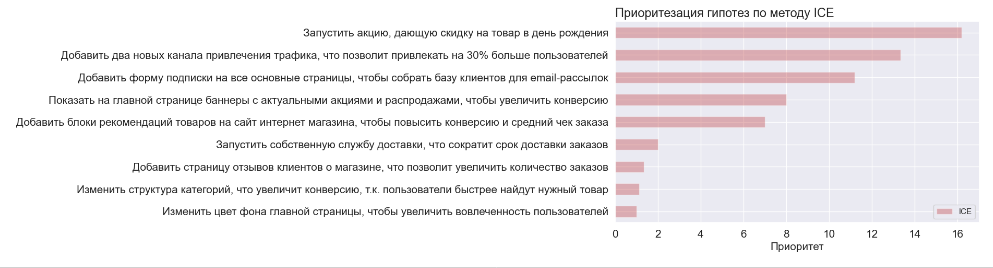  
  
* Если в расчете актуальности учитывать количество пользователей на которых повлияют изменения и расчитывать приоритезацию по RICE, предпочтение отдается другим гипотезам:  
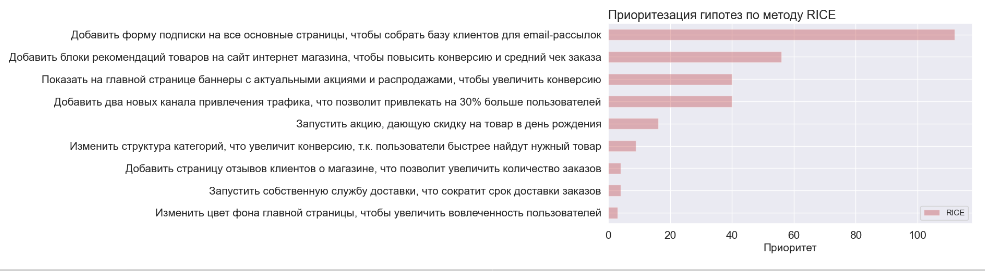
  


**Часть 2**  
* Количество участников в группе B на 1.5% больше чем участников в группе А. Так же 5.6% от общего количества были найдены в обеих группах сразу. Это может указывать на неккоректное деление трафика между группами и стоит обратьть на это внимание.
* Есть статистически значимые различия по среднему количеству заказов между группами А и В как по "сырым", так и по "очищенным" данным.  А относительный прирост группы В по не фильтрованным и фильтрованным данным составляет 15.98% и 17,81%. соответственно;
* Нет статистически значимых различий по среднему чеку мужду группами А и В по очищенным и не очищенным данным;
* График относительного изменения кумулятивной среднего числа заказов на пользователя группы B к группе A показывает, что результаты группы В стабильно лучше группы А, и сильных колебаний на нем уже нет.
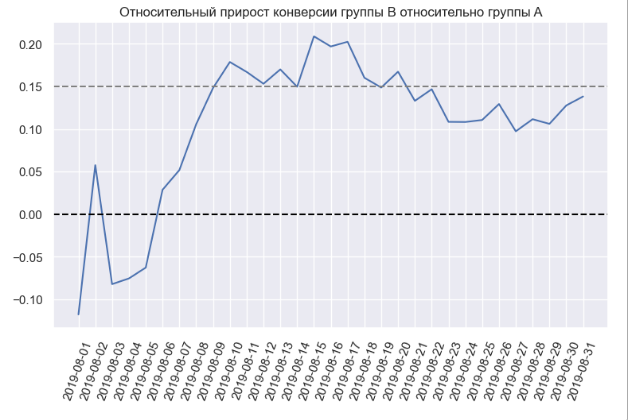
* График различия среднего чека говорит о том, что результаты группы В так же стабильно лучше.
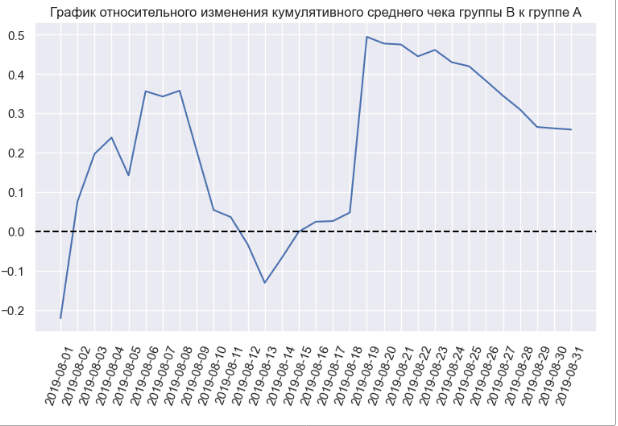  
*  Исходя из полученных данных можно остановить тест, зафиксировав победу группы В так как:
    * A/B тест идет уже месяц - достаточно долгий срок;
    * график различия по среднему количеству заказов на посетителя за этот период близок к стабилизации - каких-то существенных колебаний на графике мы уже не видим;
    * а вот график среднего чека не стабилизировался за этот период и, судя по графику, к этому нет никаких предпосылок - колебания на графике не пропали. Однако при довольно долгом проведении теста в силу закона больших чисел стат значимые различия мы рано или поздно получим и по среднему чеку, однако достоверными эти результаты уже не будут: при проектировании А/В теста одним из важных его параметров является срок, который оценивается исходя из аудитории, желаемых различий в показателях и других факторов, поэтому продление теста может сильно нарушить вводные, из которых был спроектирован тест.
    *  Учитывая что есть стат значимая разница по количеству заказов на пользователя у группы В: прирост заказов - уже отличный результат для бизнеса, даже если он не повлёк увеличение среднего чека. Как минимум, компания распродаёт запасы, получает операционную выручку, может расти, а также увеличивает популярность. Поэтому позитивное воздействие от изменения всё же есть.
    * Плюс каждый день активного А/В теста - это затраты для бизнеса которые при уже достигнутых результатах можно направить на исследование следующей фичи, а не продолжать тестировать эту.

